In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import scipy.stats as stats

In [6]:
net = pd.read_csv('netflix_titles.csv')

In [99]:
net.shape

(8807, 12)

In [100]:
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [101]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [102]:
net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### **Data Cleaning**

In [103]:
net.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [104]:
# Handling missing values

# Wrong way
# net['diretor'].fillna("Unknown", inplace=True)

# Correct way
net['director'] = net['director'].fillna("Unknown")
net['cast'] = net['cast'].fillna("Unknown")
net['country'] = net['country'].fillna("Unknown")

In [106]:
# To see the datetime & year

net['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [107]:
# Convert dae_added to datetime and year

# net['date_added'] = pd.to_datetime(net['date_added'])

net['date_added'] = pd.to_datetime(net['date_added'].str.strip(), 
                                   errors='coerce')

In [108]:
net['year_added'] = net['date_added'].dt.year.astype('Int64')

In [109]:
net[['date_added', 'year_added']].head()

,date_added,year_added
0,2021-09-25,2021
1,2021-09-24,2021
2,2021-09-24,2021
3,2021-09-24,2021
4,2021-09-24,2021


In [110]:
# Splitting duration into number and unit

net['duration_num'] = net['duration'].str.extract('(\d+)').astype(float)
net['duration_unit'] = net['duration'].str.extract('([a-zA-Z]+)')

In [112]:
# Replace show id from str to int only 

net['show_id'] = net['show_id'].str.replace('s', '', regex=False).astype(int)

In [114]:
# net = net.drop(columns=['duration'])

In [115]:
# Split genre

net['genre_list'] = net['listed_in'].str.split(', ')

In [116]:
# Standardize text and columns 

net['type'] = net['type'].str.strip()
net['rating'] = net['rating'].str.strip()

In [117]:
net.drop_duplicates(subset=['title', 'release_year'], inplace=True)

In [118]:
net.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
year_added       10
duration_num      3
duration_unit     3
genre_list        0
dtype: int64

In [119]:
net[net['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_num,duration_unit,genre_list
6066,6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",<NA>,2.0,Seasons,"[British TV Shows, TV Comedies, TV Dramas]"
6174,6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,<NA>,5.0,Seasons,[Docuseries]
6795,6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,<NA>,11.0,Seasons,"[Classic & Cult TV, TV Comedies]"
6806,6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,<NA>,10.0,Seasons,"[Classic & Cult TV, TV Comedies]"
6901,6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",<NA>,2.0,Seasons,"[Anime Series, Crime TV Shows]"
7196,7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,<NA>,2.0,Seasons,[Kids' TV]
7254,7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",<NA>,3.0,Seasons,"[International TV Shows, Spanish-Language TV S..."
7406,7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",<NA>,4.0,Seasons,[TV Comedies]
7847,7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",<NA>,13.0,Seasons,"[TV Action & Adventure, TV Comedies, TV Sci-Fi..."
8182,8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",<NA>,2.0,Seasons,"[Kids' TV, TV Comedies]"


### **3. Basic EDA**

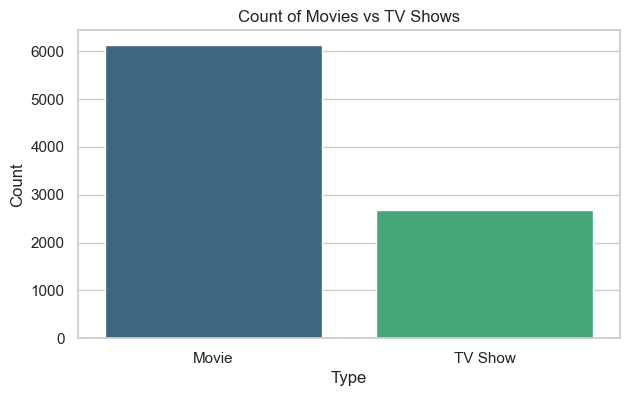

In [120]:
plt.figure(figsize=(7,4))
# sns.countplot(data=net, x='type', palette='viridis')
sns.countplot(data=net, x='type', hue='type', palette='viridis', legend=False)
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

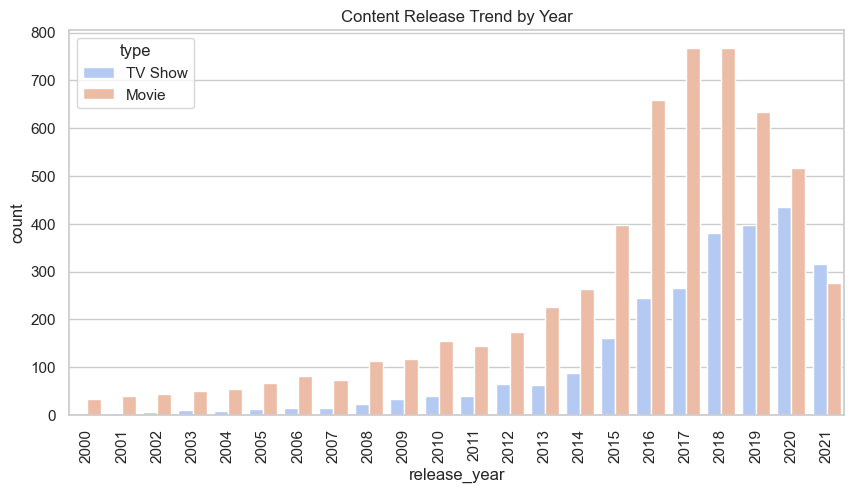

In [121]:
# Content growth by year

net_recent = net[net['release_year'] >= 2000]

plt.figure(figsize=(10,5))
sns.countplot(data=net, 
              x='release_year', 
              hue='type', 
              palette='coolwarm',
              order=sorted(net_recent['release_year'].unique()))
plt.xticks(rotation=90)
plt.title("Content Release Trend by Year")
plt.show()         

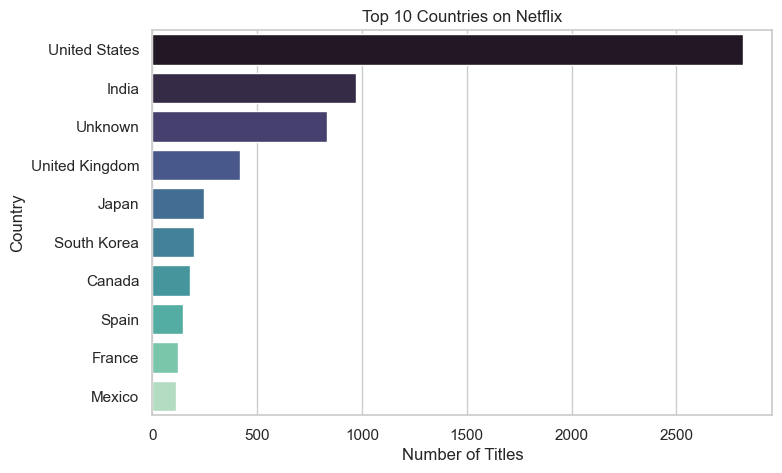

In [87]:
# Top 10 countries with most content

top_countries = net['country'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, 
            y=top_countries.index, 
            hue=top_countries.index, 
            palette='mako', 
            legend=False)
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

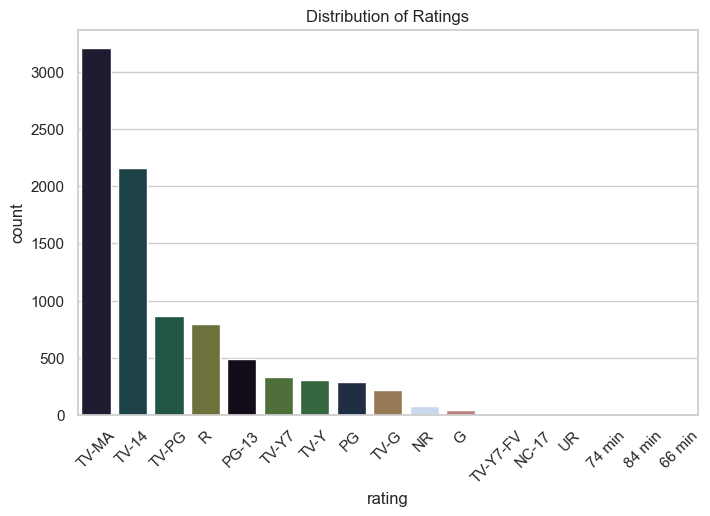

In [88]:
# Distribution of Ratings

plt.figure(figsize=(8,5))
sns.countplot(data=net,
              x='rating',
              hue='rating',   
              order=net['rating'].value_counts().index,
              palette='cubehelix',
              legend=False)   # hide duplicate legend
plt.xticks(rotation=45)
plt.title("Distribution of Ratings")
plt.show()

In [122]:
net = net.drop(columns=['listed_in'])

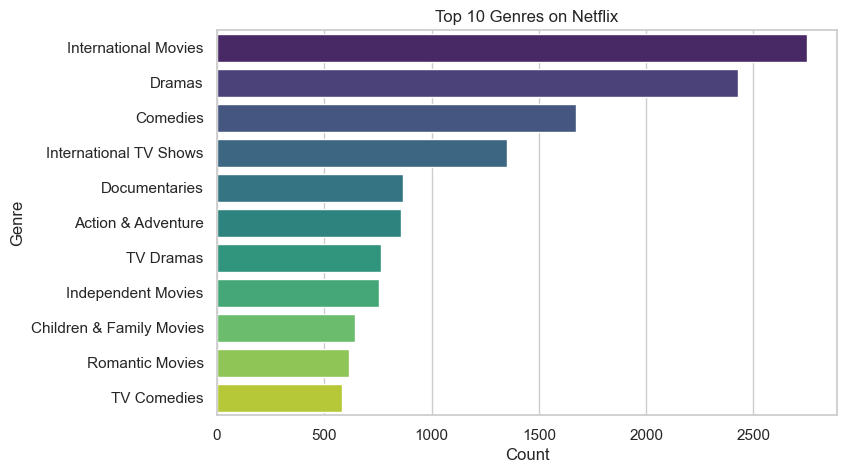

In [123]:
# Top 10 genere 

from collections import Counter

# Flatten all genres into one list
all_genres = [genre for sublist in net['genre_list'].dropna() for genre in sublist]
genre_counts = Counter(all_genres).most_common(11)

# Convert to DataFrame for plotting
genres_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

plt.figure(figsize=(8,5))
sns.barplot(data=genres_df,
            x='Count',
            y='Genre',
            hue='Genre',       # add hue
            palette='viridis',
            legend=False)
plt.title("Top 10 Genres on Netflix")
plt.show()

In [124]:
sns.set(style="whitegrid")

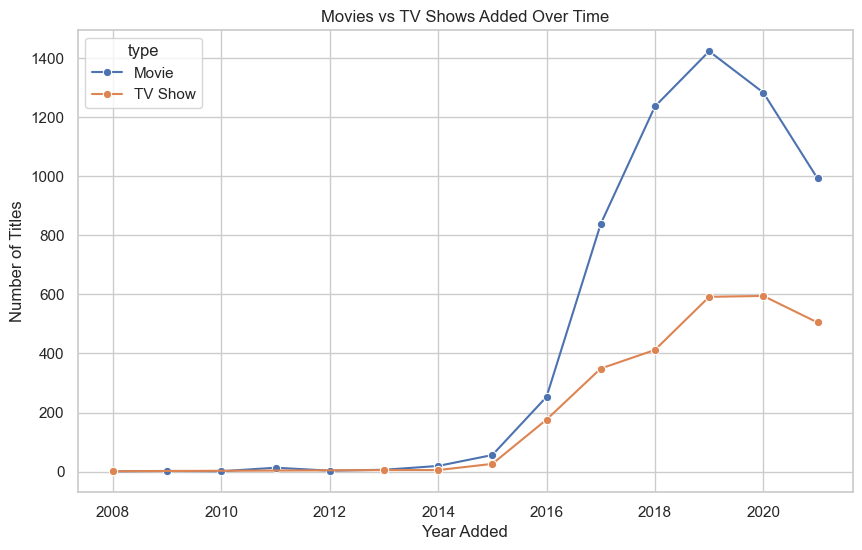

In [125]:
# Movies vs TV Shows over Time 

net['year_added'] = pd.to_datetime(net['date_added']).dt.year

type_trend = net.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.lineplot(data=type_trend,
             x='year_added',
             y='count',
             hue='type',
             marker="o")
plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

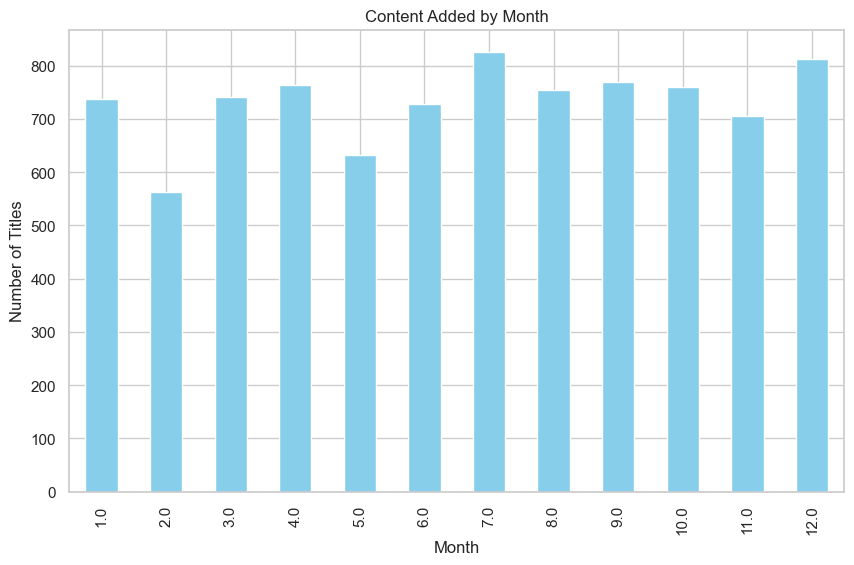

In [126]:
# Monthly Content

net['month_added'] = pd.to_datetime(net['date_added']).dt.month

month_trend = net.groupby('month_added').size()

plt.figure(figsize=(10,6))
month_trend.plot(kind='bar', color="skyblue")
plt.title("Content Added by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

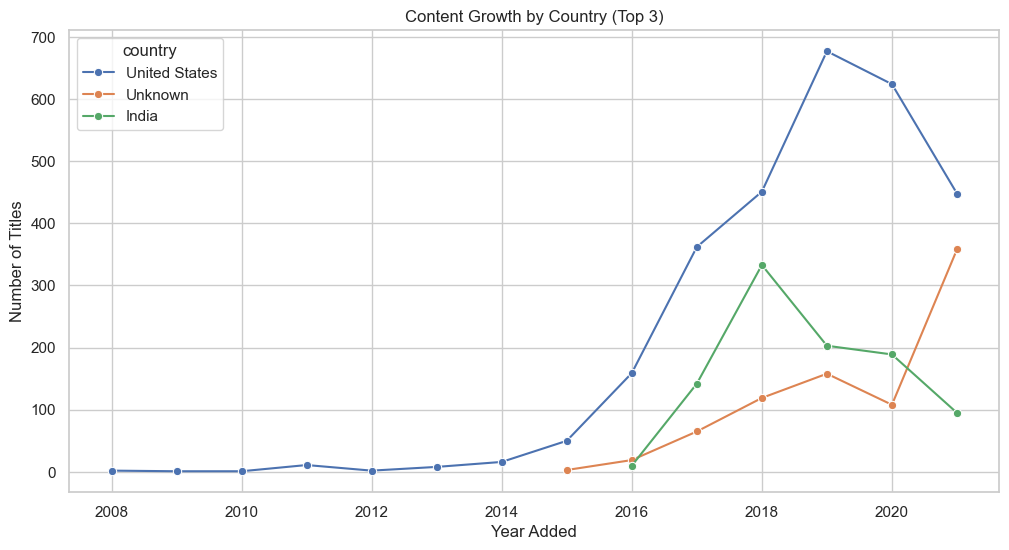

In [127]:
# Content growth by country

country_trend = (net.dropna(subset=['country'])
                   .groupby([pd.to_datetime(net['date_added']).dt.year,
                             'country'])
                   .size()
                   .reset_index(name='count'))

top_countries = net['country'].value_counts().head(3).index
country_trend = country_trend[country_trend['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=country_trend,
             x='date_added',
             y='count',
             hue='country', marker="o")
plt.title("Content Growth by Country (Top 3)")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


**Movie/Show Specific Analysis**

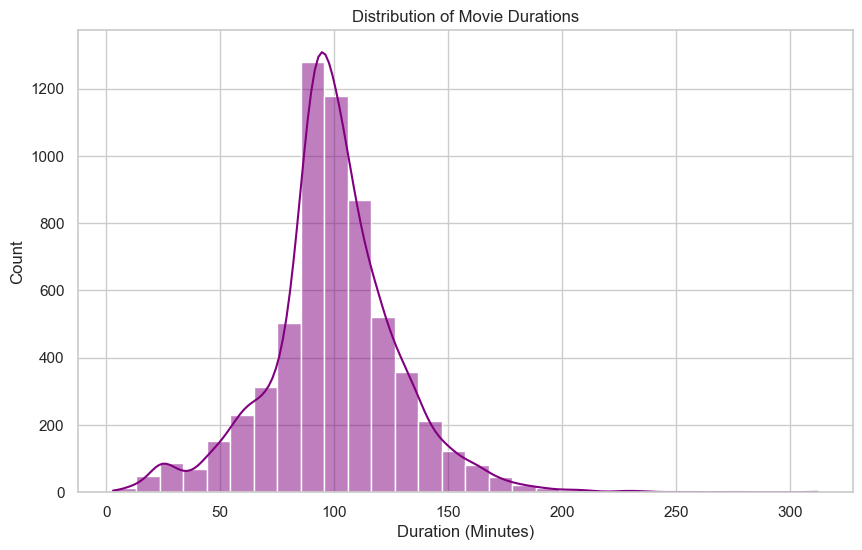

In [135]:
# Distribution of Movie Durations

# Extract numeric duration for movies
net_movies = net[net['type']=="Movie"].copy()
net_movies['duration_num'] = net_movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(net_movies['duration_num'], bins=30, kde=True, color="purple")
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

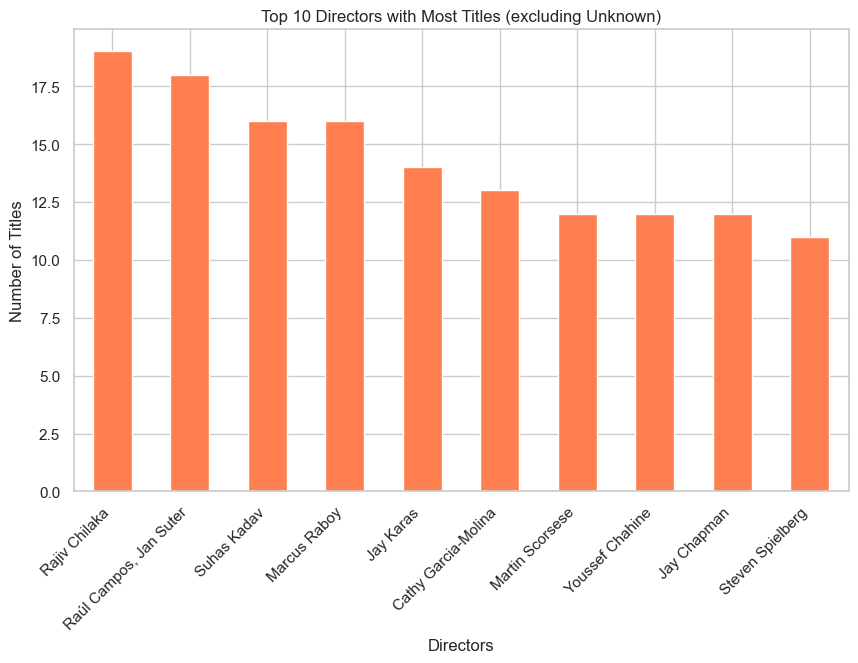

In [139]:
# Exclude null/unknown directors
directors = (
    net[net['director'].notna() & (net['director'] != 'Unknown')]
    ['director']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,6))
directors.plot(kind='bar', color="coral")
plt.title("Top 10 Directors with Most Titles (excluding Unknown)")
plt.xlabel("Directors")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")
plt.show()

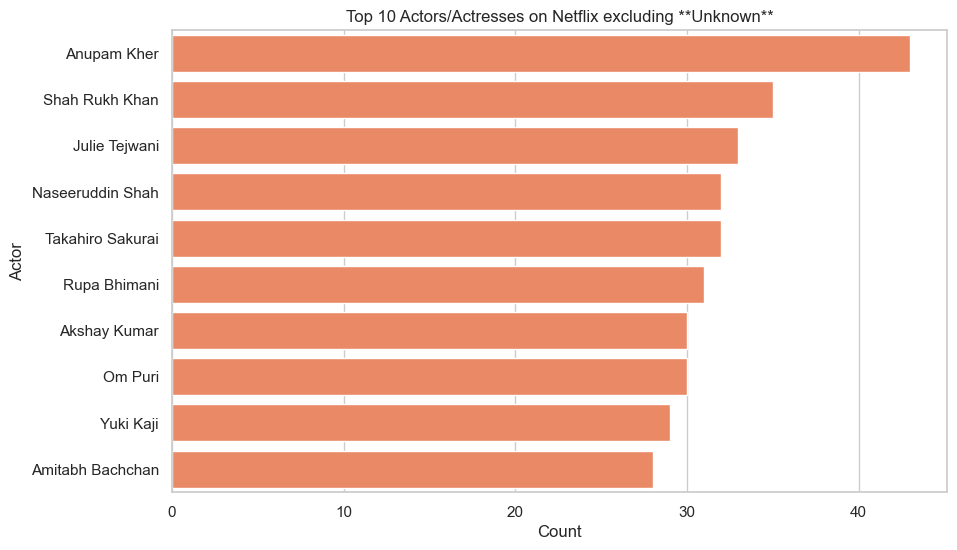

In [147]:
# Top Actors/Actress
actors = net['cast'].dropna().str.split(', ')
actor_list = [a for sublist in actors for a in sublist if a.strip().lower() != 'unknown']
actor_count = Counter(actor_list).most_common(10)

actor_df = pd.DataFrame(actor_count, columns=['Actor','Count'])

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Actor', data=actor_df, color="coral")
plt.title("Top 10 Actors/Actresses on Netflix excluding **Unknown**")
plt.show()

**Heat MAP**

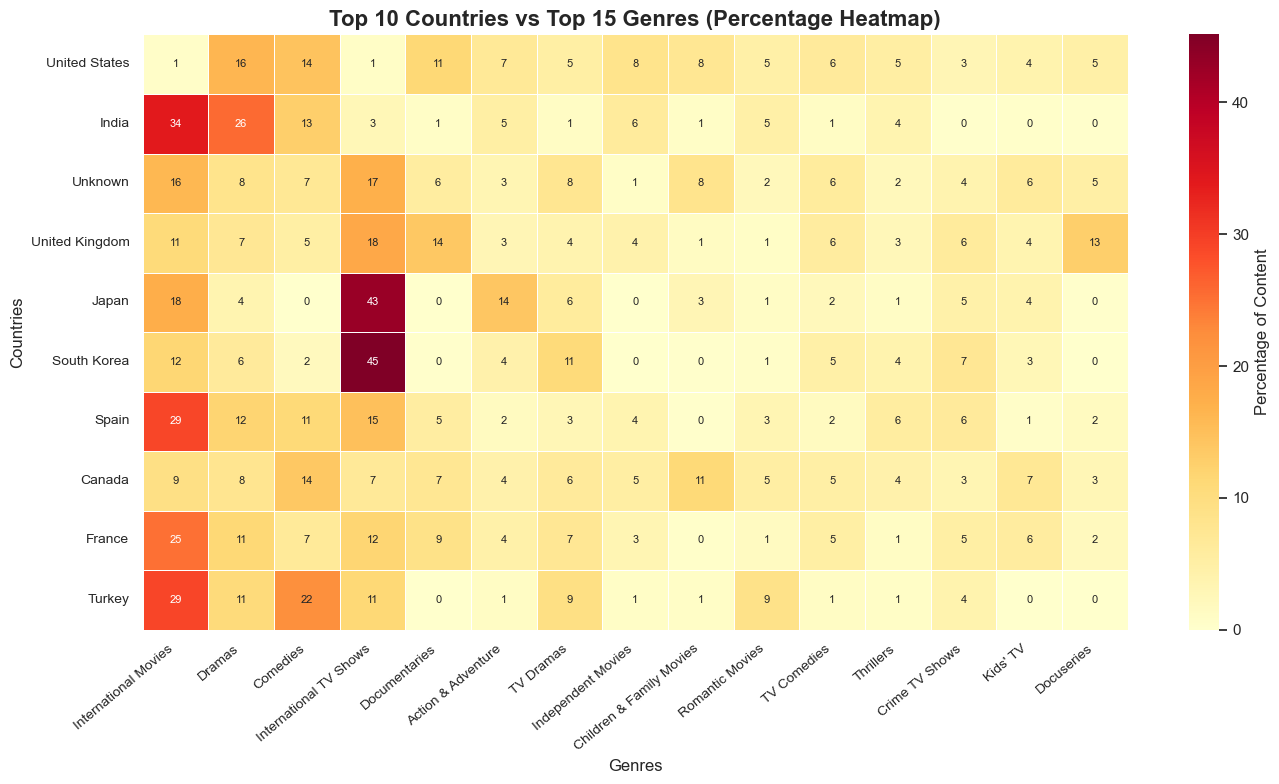

In [152]:
# Limit to top 15 genres globally
top_genres = country_genre.groupby('genre_list')['count'].sum().sort_values(ascending=False).head(15).index
pivot_table_top = pivot_table_top[top_genres]

# Normalize row-wise (proportions)
pivot_table_norm = pivot_table_top.div(pivot_table_top.sum(axis=1), axis=0) * 100  # convert to %

plt.figure(figsize=(14,8))
sns.heatmap(pivot_table_norm, 
            cmap="YlOrRd",       # warm gradient
            linewidths=.5, 
            annot=True, 
            fmt=".0f",           # whole % numbers
            cbar_kws={'label': 'Percentage of Content'},
            annot_kws={"size":8})  # smaller font for annotations

plt.title("Top 10 Countries vs Top 15 Genres (Percentage Heatmap)", fontsize=16, weight='bold')
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Countries", fontsize=12)
plt.xticks(rotation=40, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## **PROBABILITY MEASURE**

In [153]:
# Bernoulli: Probability of Movie vs TV Show
p_movie = (net['type'] == 'Movie').mean()
p_tv = 1 - p_movie
print(f"Probability(Movie) = {p_movie:.3f}, Probability(TV Show) = {p_tv:.3f}")

Probability(Movie) = 0.696, Probability(TV Show) = 0.304


In [154]:
from scipy.stats import binom

n, k = 10, 7
prob_7_movies = binom.pmf(k, n, p_movie)
print(f"P(7 out of 10 are Movies) = {prob_7_movies:.4f}")

P(7 out of 10 are Movies) = 0.2667


In [155]:
# Count releases per year
release_counts = net['release_year'].value_counts().sort_index()

# Average releases per year
lambda_year = release_counts.mean()

from scipy.stats import poisson
prob_50 = poisson.pmf(50, lambda_year)

print(f"Average releases/year = {lambda_year:.2f}")
print(f"P(Exactly 50 releases in a year) = {prob_50:.6f}")

Average releases/year = 119.01
P(Exactly 50 releases in a year) = 0.000000


In [157]:
# Export cleaned Netflix dataset to CSV

# Save as CSV (without index column)
net.to_csv("netflix_cleaned.csv", index=False)

print("Cleaned dataset exported as 'netflix_cleaned.csv'")

Cleaned dataset exported as 'netflix_cleaned.csv'
